>NAME - VAIBHAV ARORA   
>id - vaibhav.arora@praxis.ac.in    
>Profile - www.vaibhav13.me

<h1> <center> Indus Net Technologies Pvt. Ltd

<center>
<img src="https://drive.google.com/uc?export=view&id=1JaU2AgrelhyG97G8AwWyFvCtaMcdG8bT" alt="picture">
</center>

<center>
<img src="https://drive.google.com/uc?export=view&id=1j70ye8HLzzjYx8-T0R8485V24xlCmg9S" alt="picture" width="300">
</center>

**Deployment link**: https://vaibhavarora13-int-heart-disease-20xt4b.streamlit.app/ 

**PowerBI** - https://drive.google.com/file/d/1yDHX_CDwzpL3poAKuoW3Z12_gO_tmta2/view?usp=share_link

# Content Overview

1.   Dataset Overview

2.   Problem Statement

3.   Methodology

4.   Workflow

5.   Import Libraries

6.   Load Dataset

7.   Auto EDA

8.   Mannual EDA

9.   Data preprocessing

10.   Auto ML

11.   Mannual ML

12.   Hyperparameter Tunning

13.   Model Interpretation

14.   Feature Interpretation

15.   Pipeline

16.   Deployment

# Dataset Overview

This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values.
1.	Age
2.	Sex
3.	cp
4.	trestbps
5.	chol
6.	fbs
7.	restecg
8.	thalach
10.	oldpeak
11.	slope
12.	ca
13.	thal
14.	target

# Problem Statement

Binary Classification problem where we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.

# Methodology

***Step 1***.Understanding the problem statement.

***Step 2***.Overview of features.

***Step 3***.Performed Exploratory Data Analysis under which Deep Analysis of features and Target Variable, and Statiscal analysis has been done as well as Auto EDA through ***dtale*** library.

***Step 4***.Data Pre-Processing - Dropping Unnecessary Variables, Outlier treatment

***Step 5*** Standardization and checking for multi-collinearity.

***Step 6*** Feature Engine for feature elimination - Dropping of correlated,constant and duplicates.

***Step 7*** Lasso Regularization - best features

***Step 8*** Feature Importance by tree classifier.

***Step 9*** Auto ML - find out 5 best Models - Using ***Pycaret***

***Step 10*** Model fitting - Used best 5 best algorithms for this dataset

***Step 11*** Performed Hypperparameter Optimization.

***Step 12*** Select Best Model according to Test Data Accuracy

***Step 13*** Model Interpretation

***Step 14*** Feature Importance through shap

***Step 15*** Pipeline

***Step 16*** Deployment

# Import Libraries

## Pip install

In [2]:
from IPython.display import clear_output
!pip install dtale
!pip install pingouin
!pip install feature_engine
!pip install -U --pre pycaret
!pip install fancyimpute
!pip install shap
clear_output()

## Libraries

In [3]:
# Importing Libraries
import pandas as pd
import requests
from pycaret.classification import setup, compare_models, pull, finalize_model, blend_models, predict_model, models, plot_model
import io
import graphviz
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import lightgbm as lgb
from scipy.stats import chi2_contingency
import math
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesRegressor
import shap
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB  
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)
import dtale
from statsmodels.graphics.gofplots import qqplot
import dtale.app as dtale_app 
from scipy.stats import norm
import scipy
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.mosaicplot import mosaic
from pycaret.classification import *
from scipy.stats import f_oneway
import statsmodels.api as sm
import matplotlib.ticker as mtick
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from scipy.stats import spearmanr
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import export_graphviz

# Load Dataset

In [4]:
# Load the dataset mannualy

# train = pd.read_csv("Dataset.csv")

In [5]:
# No need to download datasets separately
# run these code to extract data from github
# this are the datasets provided by INT

gt_train_url = "https://raw.githubusercontent.com/VaibhavArora13/INT/main/Dataset.csv"
download_train = requests.get(gt_train_url).content
train = pd.read_csv(io.StringIO(download_train.decode('utf-8')))

In [6]:
print("\033[1m" + "Train Data" + "\033[0m")
train.head()

Train Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


# Automated EDA

**How to use this automated EDA**

> First Click on this link : ![picture](https://drive.google.com/uc?export=view&id=1Q_CDIE9zXSwdy7SK7CWm0oeC0b18oJL7)


> then click on any operation you want to use in that it will open new tab for the same : ![picture](https://drive.google.com/uc?export=view&id=12AUr1BJYoYy1vx5DG31CAk46z2IP5Tsw)

In [7]:
dtale_app.USE_COLAB = True

In [8]:
dtale.show(train)

# Mannual EDA

## Inspecting Dataframe Structure

### Structure Size

In [9]:
print("\033[1m" + "Train Shape" + "\033[0m" ,': Rows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Train Shape : Rows: 303 Columns: 14


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Insight: There are 303 rows and 14 columns in the dataset

### Datatypes 

In [11]:
print("\033[1m" + "Train Datatype" + "\033[0m")
train.dtypes

Train Datatype


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
# Value counts of train datatypes
pd.value_counts(train.dtypes)

int64      13
float64     1
dtype: int64

In [13]:
train_num = [var for var in train.columns if train[var].dtype != 'O']
train_nominal = []
for i in train_num[:-1]:
    if train[i].nunique()<10:
        train_nominal.append(i)
print('There are {} nominal variables in Data \n'.format(len(train_nominal)))
print('Nominal Variables are :', train_nominal)

There are 8 nominal variables in Data 

Nominal Variables are : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [14]:
set1 = set(train_nominal)
set2 = set(train_num[:-1])
not_common = set1.symmetric_difference(set2)
train_numerical = list(not_common)
print('There are {} numerical variable in Data \n'.format(len(train_numerical)))
print("Numerical Variables are", train_numerical)

There are 5 numerical variable in Data 

Numerical Variables are ['age', 'thalach', 'chol', 'oldpeak', 'trestbps']


Insight: This database contains 13 features and a target variable. It has 8 nominal columns and 5 numeric columns.

## Dataframe Content Inspection

### Checking Duplicate Value

In [15]:
train.duplicated().sum()
# there is no duplicate in train data

0

Insight: There is no Duplicate rows in Train Dataset

### Checking Null Values

In [16]:
# checking for null values in Train Dataset
print("\033[1m" + "Train Null Values" + "\033[0m")
train.isna().any().sum()

Train Null Values


0

Insight: From the above Numbers we can see that there is no null values present in Train Dataset

###  Infinity Value Check

In [17]:
# Check which columns contain infinity values
cols_with_inf = train.columns[np.isinf(train).any()].tolist()

# Print the columns containing infinity values
print("Columns with infinity values:", cols_with_inf)

Columns with infinity values: []


In [18]:
# number of cols that has inf values
len(cols_with_inf)

0

Insights: 0 columns have infinity values

### Short Summary of Dataset

In [19]:
print("\033[1m" + "Train Data Columns" + "\033[0m")
train.describe()

Train Data Columns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


## Detailed Analysis

I have divided this Detailed Analysis into three sets :

1. Target Variable
2. Features

### target : Target Variable

In [20]:
print("Null Value in target in Train Data :", train.target.isnull().sum())
print("Number of Unique Values in target in Train Data :", train.target.nunique())

Null Value in target in Train Data : 0
Number of Unique Values in target in Train Data : 2


In [21]:
print("Number of 1(yes) and 0(no) in Target in Train Data are :\n", train.target.value_counts())

Number of 1(yes) and 0(no) in Target in Train Data are :
 0    164
1    139
Name: target, dtype: int64


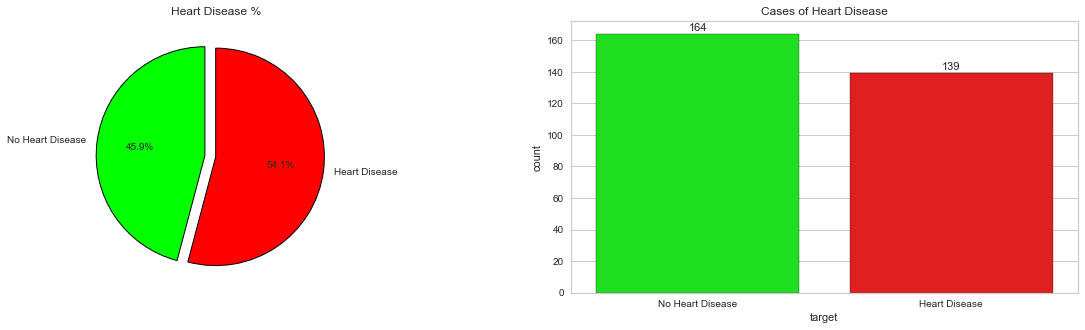

In [22]:
# count plot of target variable in Train
l = list(train['target'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]
colors = ['#00FF00','#FF0000']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('target',data = train,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

Insights: There is NO imbalanced dataset situation


So we can use **Accuracy** metric in evaluation

### Features

#### Numerical Features vs Numerical Features

[]

<Figure size 1080x720 with 0 Axes>

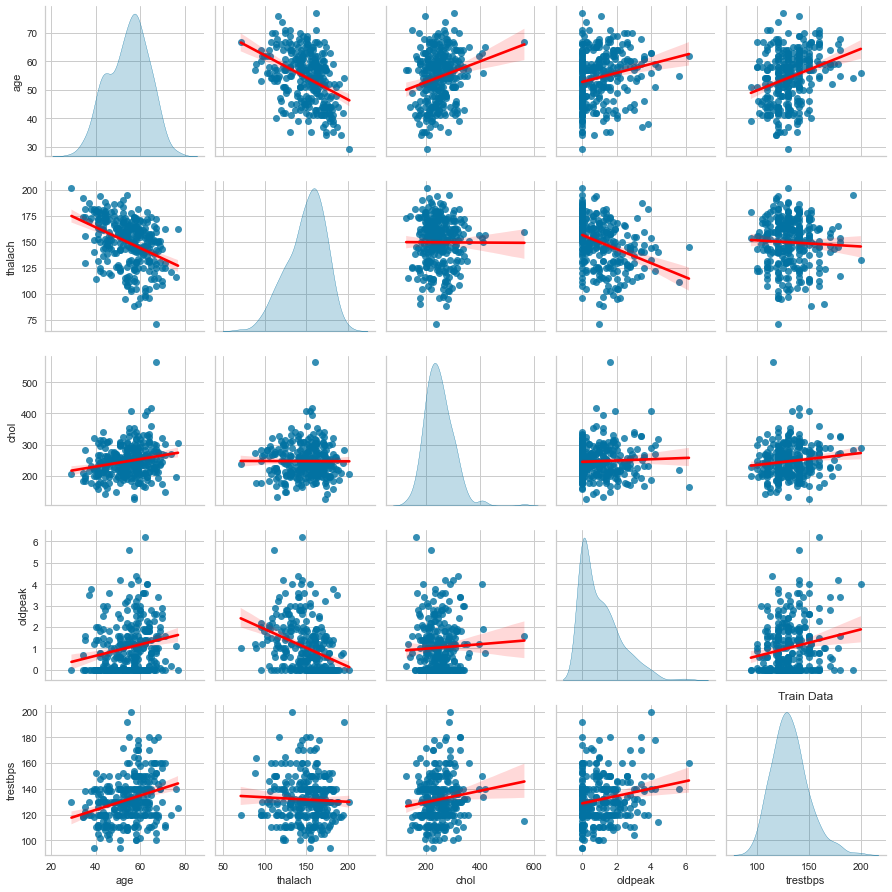

In [23]:
plt.figure(figsize=(15,10))
sns.pairplot(train[train_numerical],kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
plt.title("Train Data")
plt.tight_layout()
plt.plot()

1. Age vs. Resting Blood Pressure: There may be a weak positive correlation between age and resting blood pressure. Older patients may have slightly higher resting blood pressure than younger patients.


2. Age vs. Cholesterol: There may be a weak positive correlation between age and cholesterol levels. Older patients may have slightly higher cholesterol levels than younger patients.   


3. Maximum Heart Rate vs. ST Depression: There may be a weak negative correlation between maximum heart rate achieved during exercise and ST depression. Patients who achieve higher maximum heart rates during exercise may have lower ST depression values.


4. Maximum Heart Rate vs. Exercise Induced Angina: There may be a weak negative correlation between maximum heart rate achieved during exercise and the presence of exercise-induced angina. Patients who achieve higher maximum heart rates during exercise may be less likely to experience exercise-induced angina.


5. Maximum Heart Rate vs. Oldpeak: There may be a weak negative correlation between maximum heart rate achieved during exercise and the extent of ST depression induced by exercise (measured by Oldpeak). Patients who achieve higher maximum heart rates during exercise may have lower Oldpeak values.


6. Cholesterol vs. Resting Blood Pressure: There may not be a significant correlation between cholesterol levels and resting blood pressure. Patients with high cholesterol levels may not necessarily have high resting blood pressure, and vice versa.


7. Oldpeak vs. ST Depression: There may be a moderate positive correlation between the extent of ST depression induced by exercise (measured by Oldpeak) and the magnitude of ST depression at rest. Patients with higher ST depression at rest may experience more ST depression during exercise.

#### Outlier Analysis

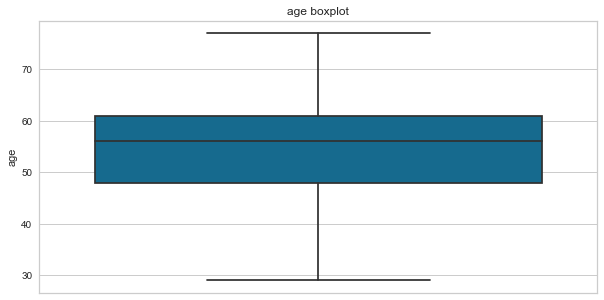

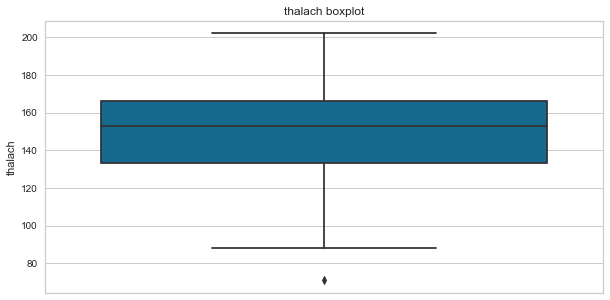

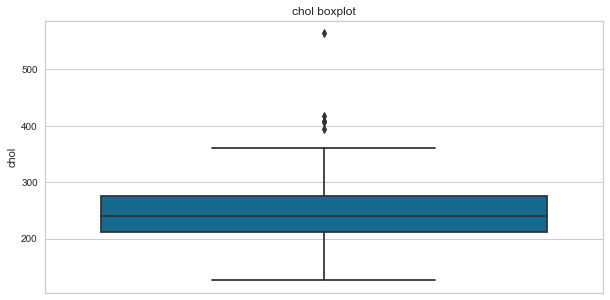

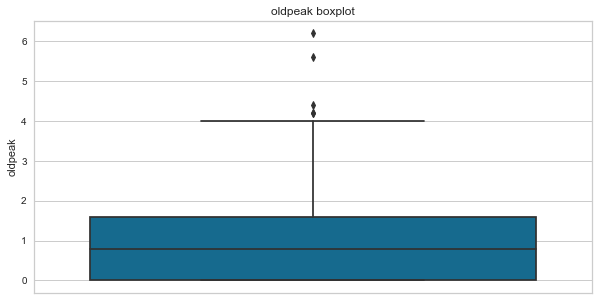

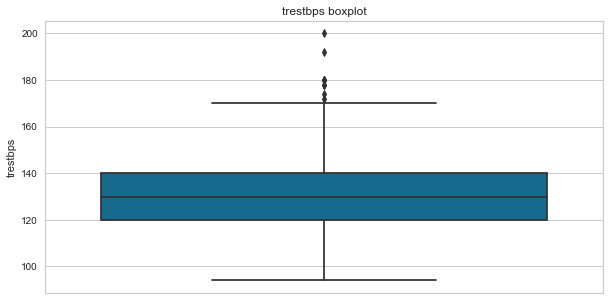

In [24]:
# Boxplot
for col in train_numerical:
    plt.figure(figsize=(10,5))
    sns.boxplot(y=col, data=train)
    plt.title(f'{col} boxplot')
    plt.show()

In [25]:
outliers_cols = []
def outliers_list_col(data, num_cols, threshold=1.5):
    for col in num_cols:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        iqr = q3 - q1
        lower_threshold = q1 - threshold * iqr
        upper_threshold = q3 + threshold * iqr
        outliers = data[(data[col] < lower_threshold) | (data[col] > upper_threshold)]
        if not outliers.empty:
            outliers_cols.append(col)
    return outliers_cols

outliers_list_col(train,train_numerical)

['thalach', 'chol', 'oldpeak', 'trestbps']

In [26]:
# cols have outliers
len(outliers_cols)

4

Insights: 4 features have outliers 

#### Normal Distribution Analysis

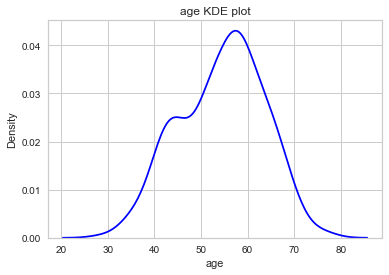

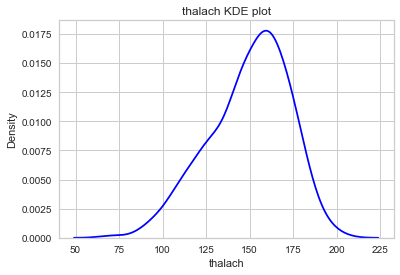

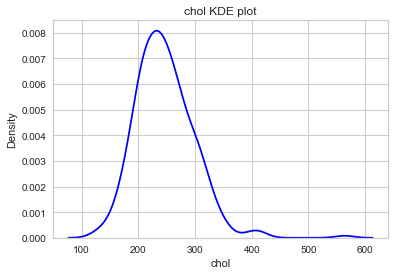

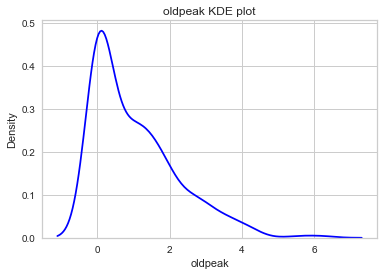

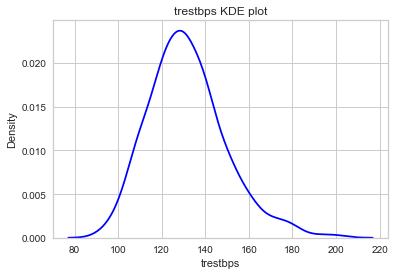

In [27]:
# Histplot function
for col in train_numerical:
    sns.kdeplot(data=train[col], color='blue')
    plt.title(f'{col} KDE plot')
    plt.show()

Insights:
1. Age: Older patients are more likely to have heart disease than younger patients.


2. Oldpeak: Patients with a higher ST depression induced by exercise relative to rest are more likely to have heart disease.


3. Thalach: Patients with a higher maximum heart rate achieved are less likely to have heart disease.


4. Trestbps: There does not appear to be a clear relationship between resting blood pressure and heart disease.


5. Chol: Patients with higher cholesterol levels are more likely to have heart disease.

Why normal distribution analysis


> Model performance: Some machine learning algorithms like logistic regression in this case, assume that the target variable is normally distributed. By transforming the numerical variables to have a normal distribution, we can improve the performance of these models.

> Outlier handling: Transforming the data to have a normal distribution can help us better handle outliers. Outliers can have a large impact on the mean and standard deviation, which are used in many machine learning algorithms. By transforming the data, we can reduce the impact of outliers on these statistics.

> Interpretation: Normal distributions are easy to interpret and visualize. By transforming the data to have a normal distribution, we can more easily understand the distribution of our data and identify patterns and relationships.

1.   When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

2.   If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

3.   Mesokurtosis: A kurtosis of 0. Platykurtosis: A negative excess kurtosis. Platykurtic distributions are thin-tailed, meaning that they have few outliers. Leptokurtosis: A positive excess kurtosis. Leptokurtic distributions are fat-tailed, meaning that they have many outliers.

In [28]:
def check_normal_distribution(df, thresh=1.96):
    numerical_cols = train_numerical
    cols = []
    skewness = []
    kurt = []
    is_normal = []
    for col in numerical_cols:
        skew_val = skew(df[col])
        kurtosis_val = kurtosis(df[col])
        normal = abs(skew_val) < thresh and abs(kurtosis_val - 3) < thresh
        cols.append(col)
        skewness.append(skew_val)
        kurt.append(kurtosis_val)
        is_normal.append(normal)
    results = pd.DataFrame({"Column": cols, "Skewness": skewness, "Kurtosis": kurt, "Is_Normal": is_normal})
    return results

check_normal_distribution(train)

,Column,Skewness,Kurtosis,Is_Normal
0,age,-0.208024,-0.534523,False
1,thalach,-0.534784,-0.072398,False
2,chol,1.129874,4.398208,True
3,oldpeak,1.263426,1.530193,True
4,trestbps,0.702535,0.845881,False


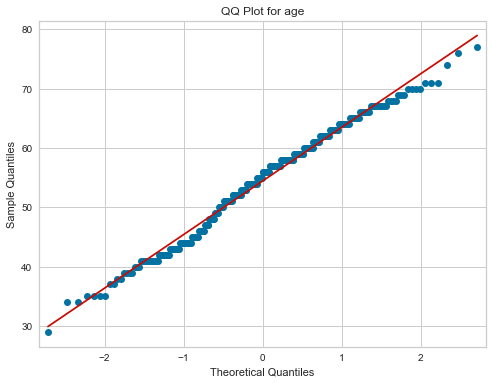

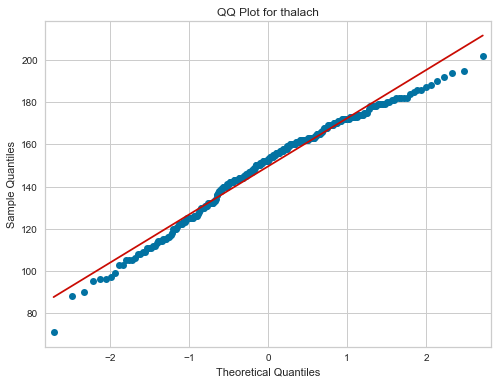

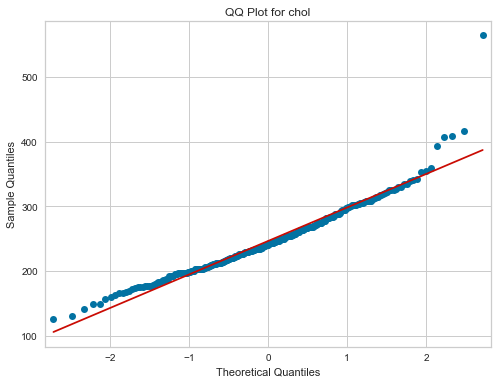

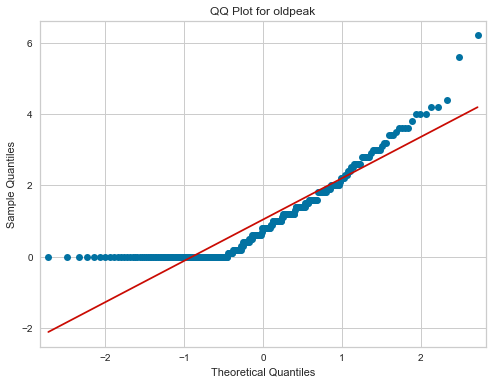

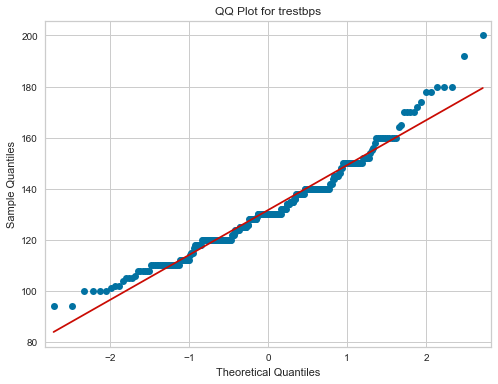

In [29]:
def generate_qq_plots(df):
    numerical_cols = train_numerical
    for col in numerical_cols:
        fig, ax = plt.subplots(figsize=(8, 6))
        sm.qqplot(df[col], line='s', ax=ax)
        ax.set_title(f"QQ Plot for {col}")
        plt.show()
generate_qq_plots(train)

In [30]:
right_skewed_cols = ["oldpeak"]

Insights:

1. Approximately I can say that by visualising, Skewness and Kurtosis score  - "Oldpeak" distribution is rightly skewed.

#### Correlation Analysis

<AxesSubplot: >

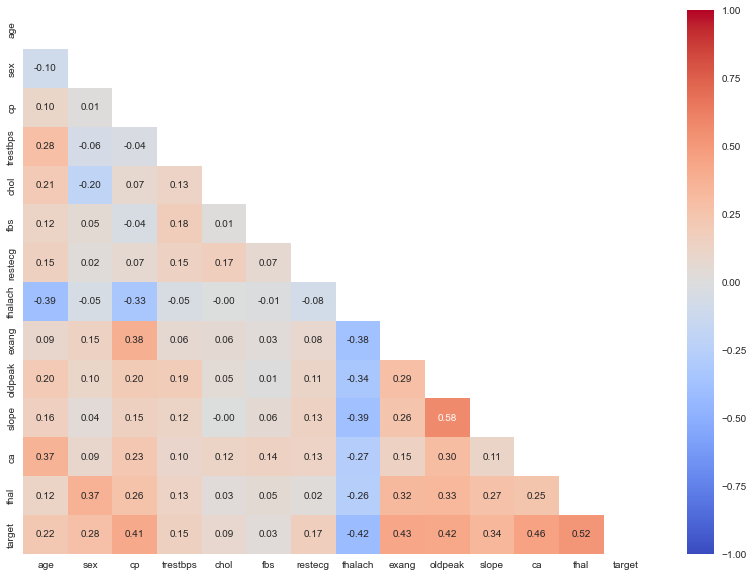

In [31]:
matrix = np.triu(train.corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (train.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax)

In [32]:
(train.corr()["target"]).sort_values(ascending=False)[1:]

thal        0.515894
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64

Insights: 
1. Weak level correlation between the numerical features and the target variable (heart disease)
2. Oldpeak (depression related number) has a positive correlation with the target (heart disease)
3. thal (A blood disorder) has the highest positive correlation with the target (heart disease)
4. thalach (Maximum heart rate achieved) has the only one which has negative correlation with target (heart disease)

#### Nominal Features vs Target

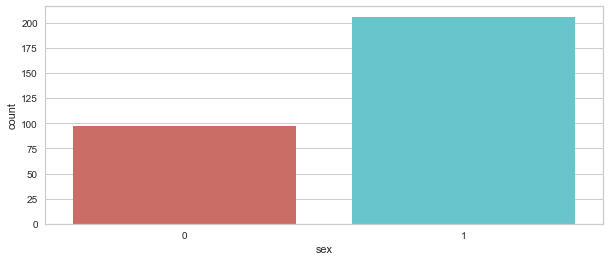

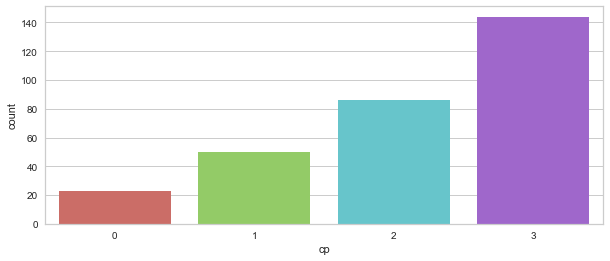

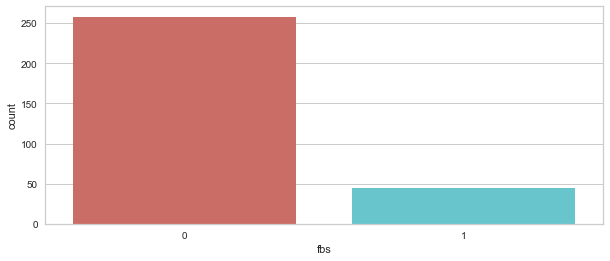

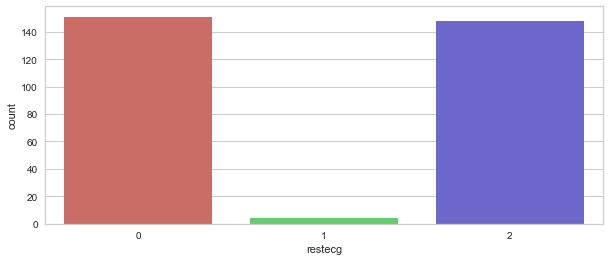

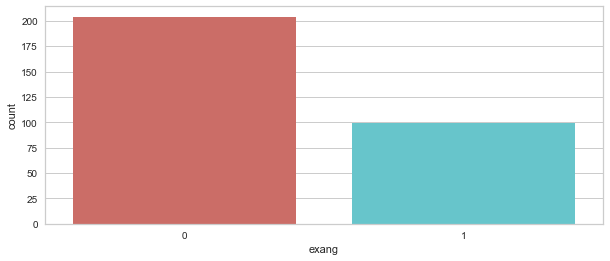

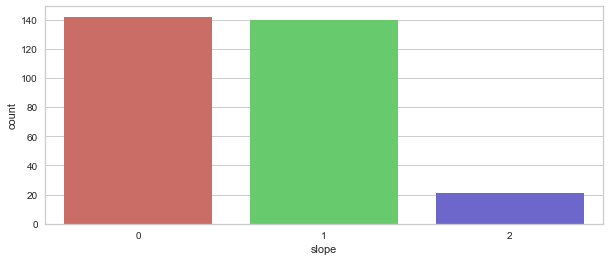

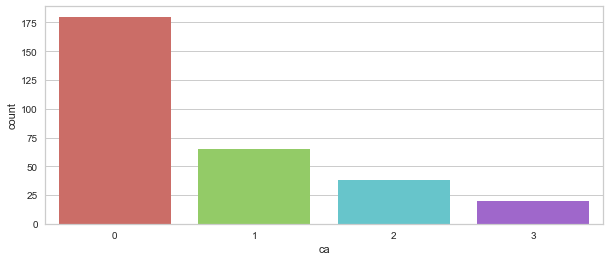

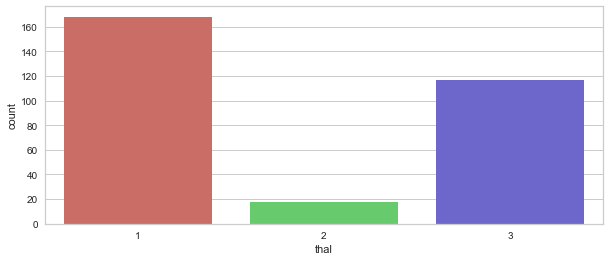

In [33]:
# Count plot 
for col in train_nominal:
    plt.figure(figsize=(10,4))
    ax=sns.countplot(x=col,data=train, palette = "hls")
    plt.show()

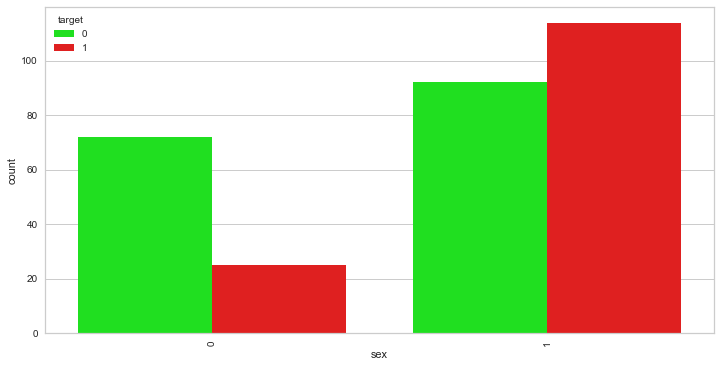

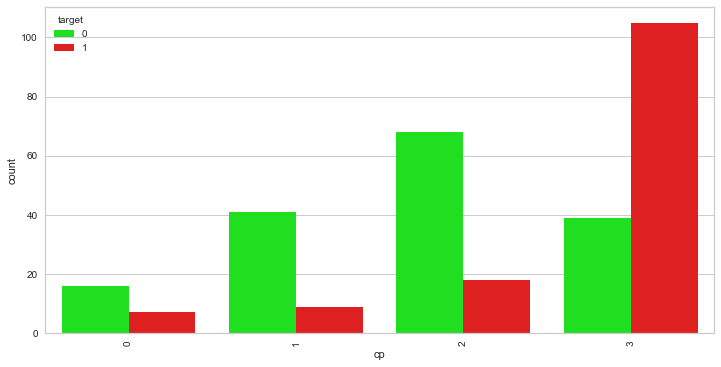

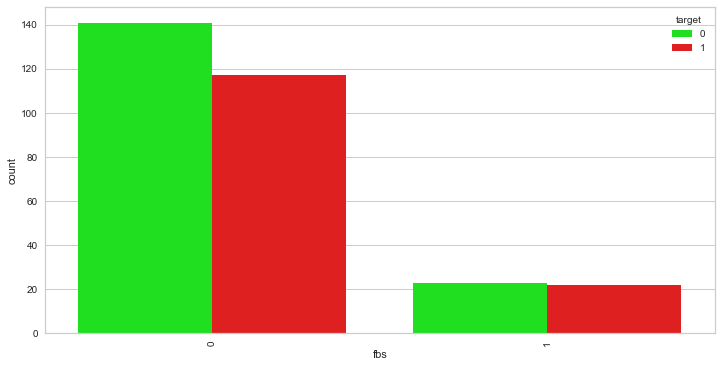

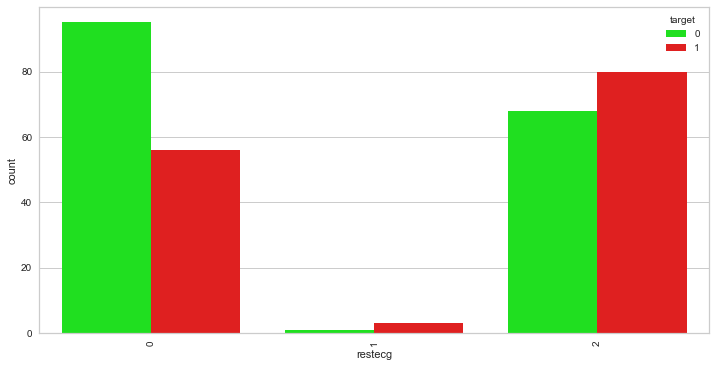

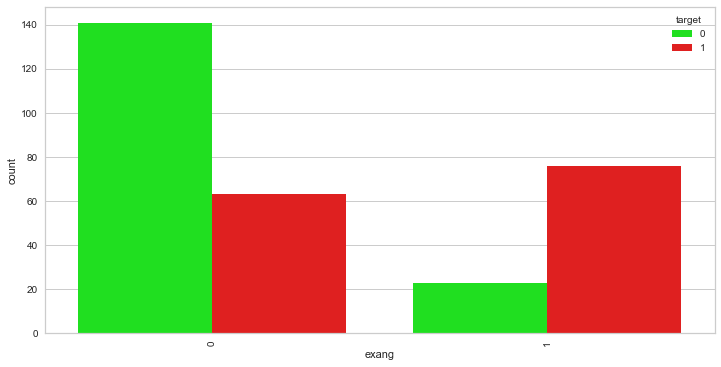

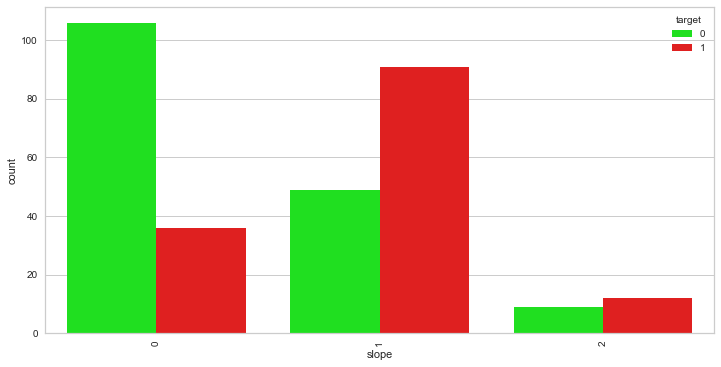

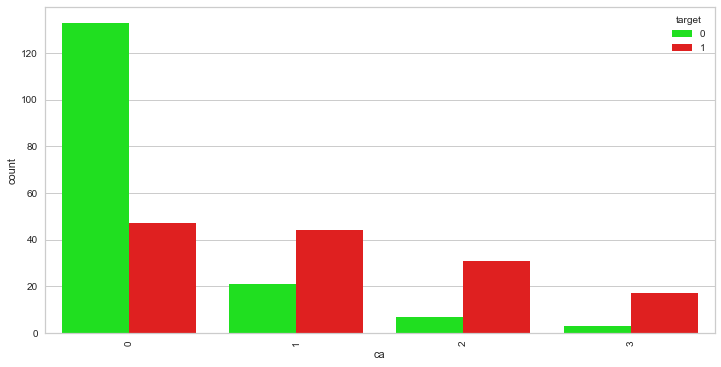

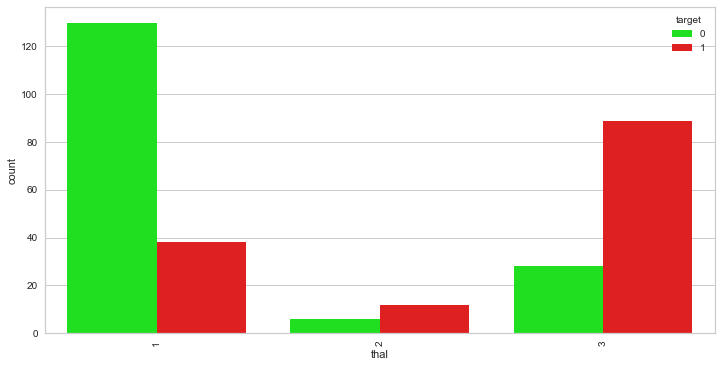

In [34]:
# Count plot with target variable
for col in train_nominal:
  plt.figure(figsize=(12,6))
  sns.countplot(data=train,x= col,hue='target',palette=colors)
  plt.xticks(rotation='vertical')
  plt.show()

In [35]:
def percentage_by_class(df, col_name, target_name):
    counts_by_class = df[col_name].value_counts()
    df_perc = pd.DataFrame(columns=[col_name, 'Count', 'Target_0_Percentage', 'Target_1_Percentage'])    
    for cls in counts_by_class.index:
        cls_data = df[df[col_name] == cls]
        target_counts = cls_data[target_name].value_counts()
        target_perc = (target_counts / target_counts.sum()) * 100
        df_perc = df_perc.append({col_name: cls, 'Count': counts_by_class[cls], 'Target_0_Percentage': target_perc[0], 'Target_1_Percentage': target_perc[1]}, ignore_index=True)
    return df_perc
for col in train_nominal: 
    result_1 =  percentage_by_class(train,col,"target")
    print(result_1)
    print("\n")

   sex  Count Target_0_Percentage Target_1_Percentage
0  1.0  206.0           44.660194           55.339806
1  0.0   97.0           74.226804           25.773196


    cp  Count Target_0_Percentage Target_1_Percentage
0  3.0  144.0           27.083333           72.916667
1  2.0   86.0           79.069767           20.930233
2  1.0   50.0                82.0                18.0
3  0.0   23.0           69.565217           30.434783


   fbs  Count Target_0_Percentage Target_1_Percentage
0  0.0  258.0           54.651163           45.348837
1  1.0   45.0           51.111111           48.888889


  restecg  Count Target_0_Percentage Target_1_Percentage
0     0.0  151.0           62.913907           37.086093
1     2.0  148.0           45.945946           54.054054
2     1.0    4.0                25.0                75.0


  exang  Count Target_0_Percentage Target_1_Percentage
0   0.0  204.0           69.117647           30.882353
1   1.0   99.0           23.232323           76.767677


  s

Insights:
1. sex: Females have a higher percentage of no heart disease compared to males, while males have a higher percentage of heart disease.


2. cp: Chest pain type 0(typical angina) has a higher percentage of no heart disease compared to the other types, while type 1(atypical angina) has the highest percentage of heart disease.


3. fbs: There is no significant difference in the percentage of no heart disease vs heart disease between fasting blood sugar levels above and below 120 mg/dl.


4. restecg: Electrocardiographic results of type 0 have a higher percentage of no heart disease compared to the other types, while type 2 has a higher percentage of heart disease.


5. exang: Patients with exercise-induced angina have a much higher percentage of heart disease compared to those without.


6. slope: Slope type 1(flat) has the highest percentage of no heart disease, while type 2(down sloping) has the highest percentage of heart disease.


7. ca: Patients with a higher number of major vessels colored by fluoroscopy (ca) have a higher percentage of heart disease.


8. thal: Thalassemia type 3(reversible defect) has a higher percentage of no heart disease compared to the other types, while type 2(fixed defect) has the highest percentage of heart disease.

#### Nominal Features vs Numerical Features 

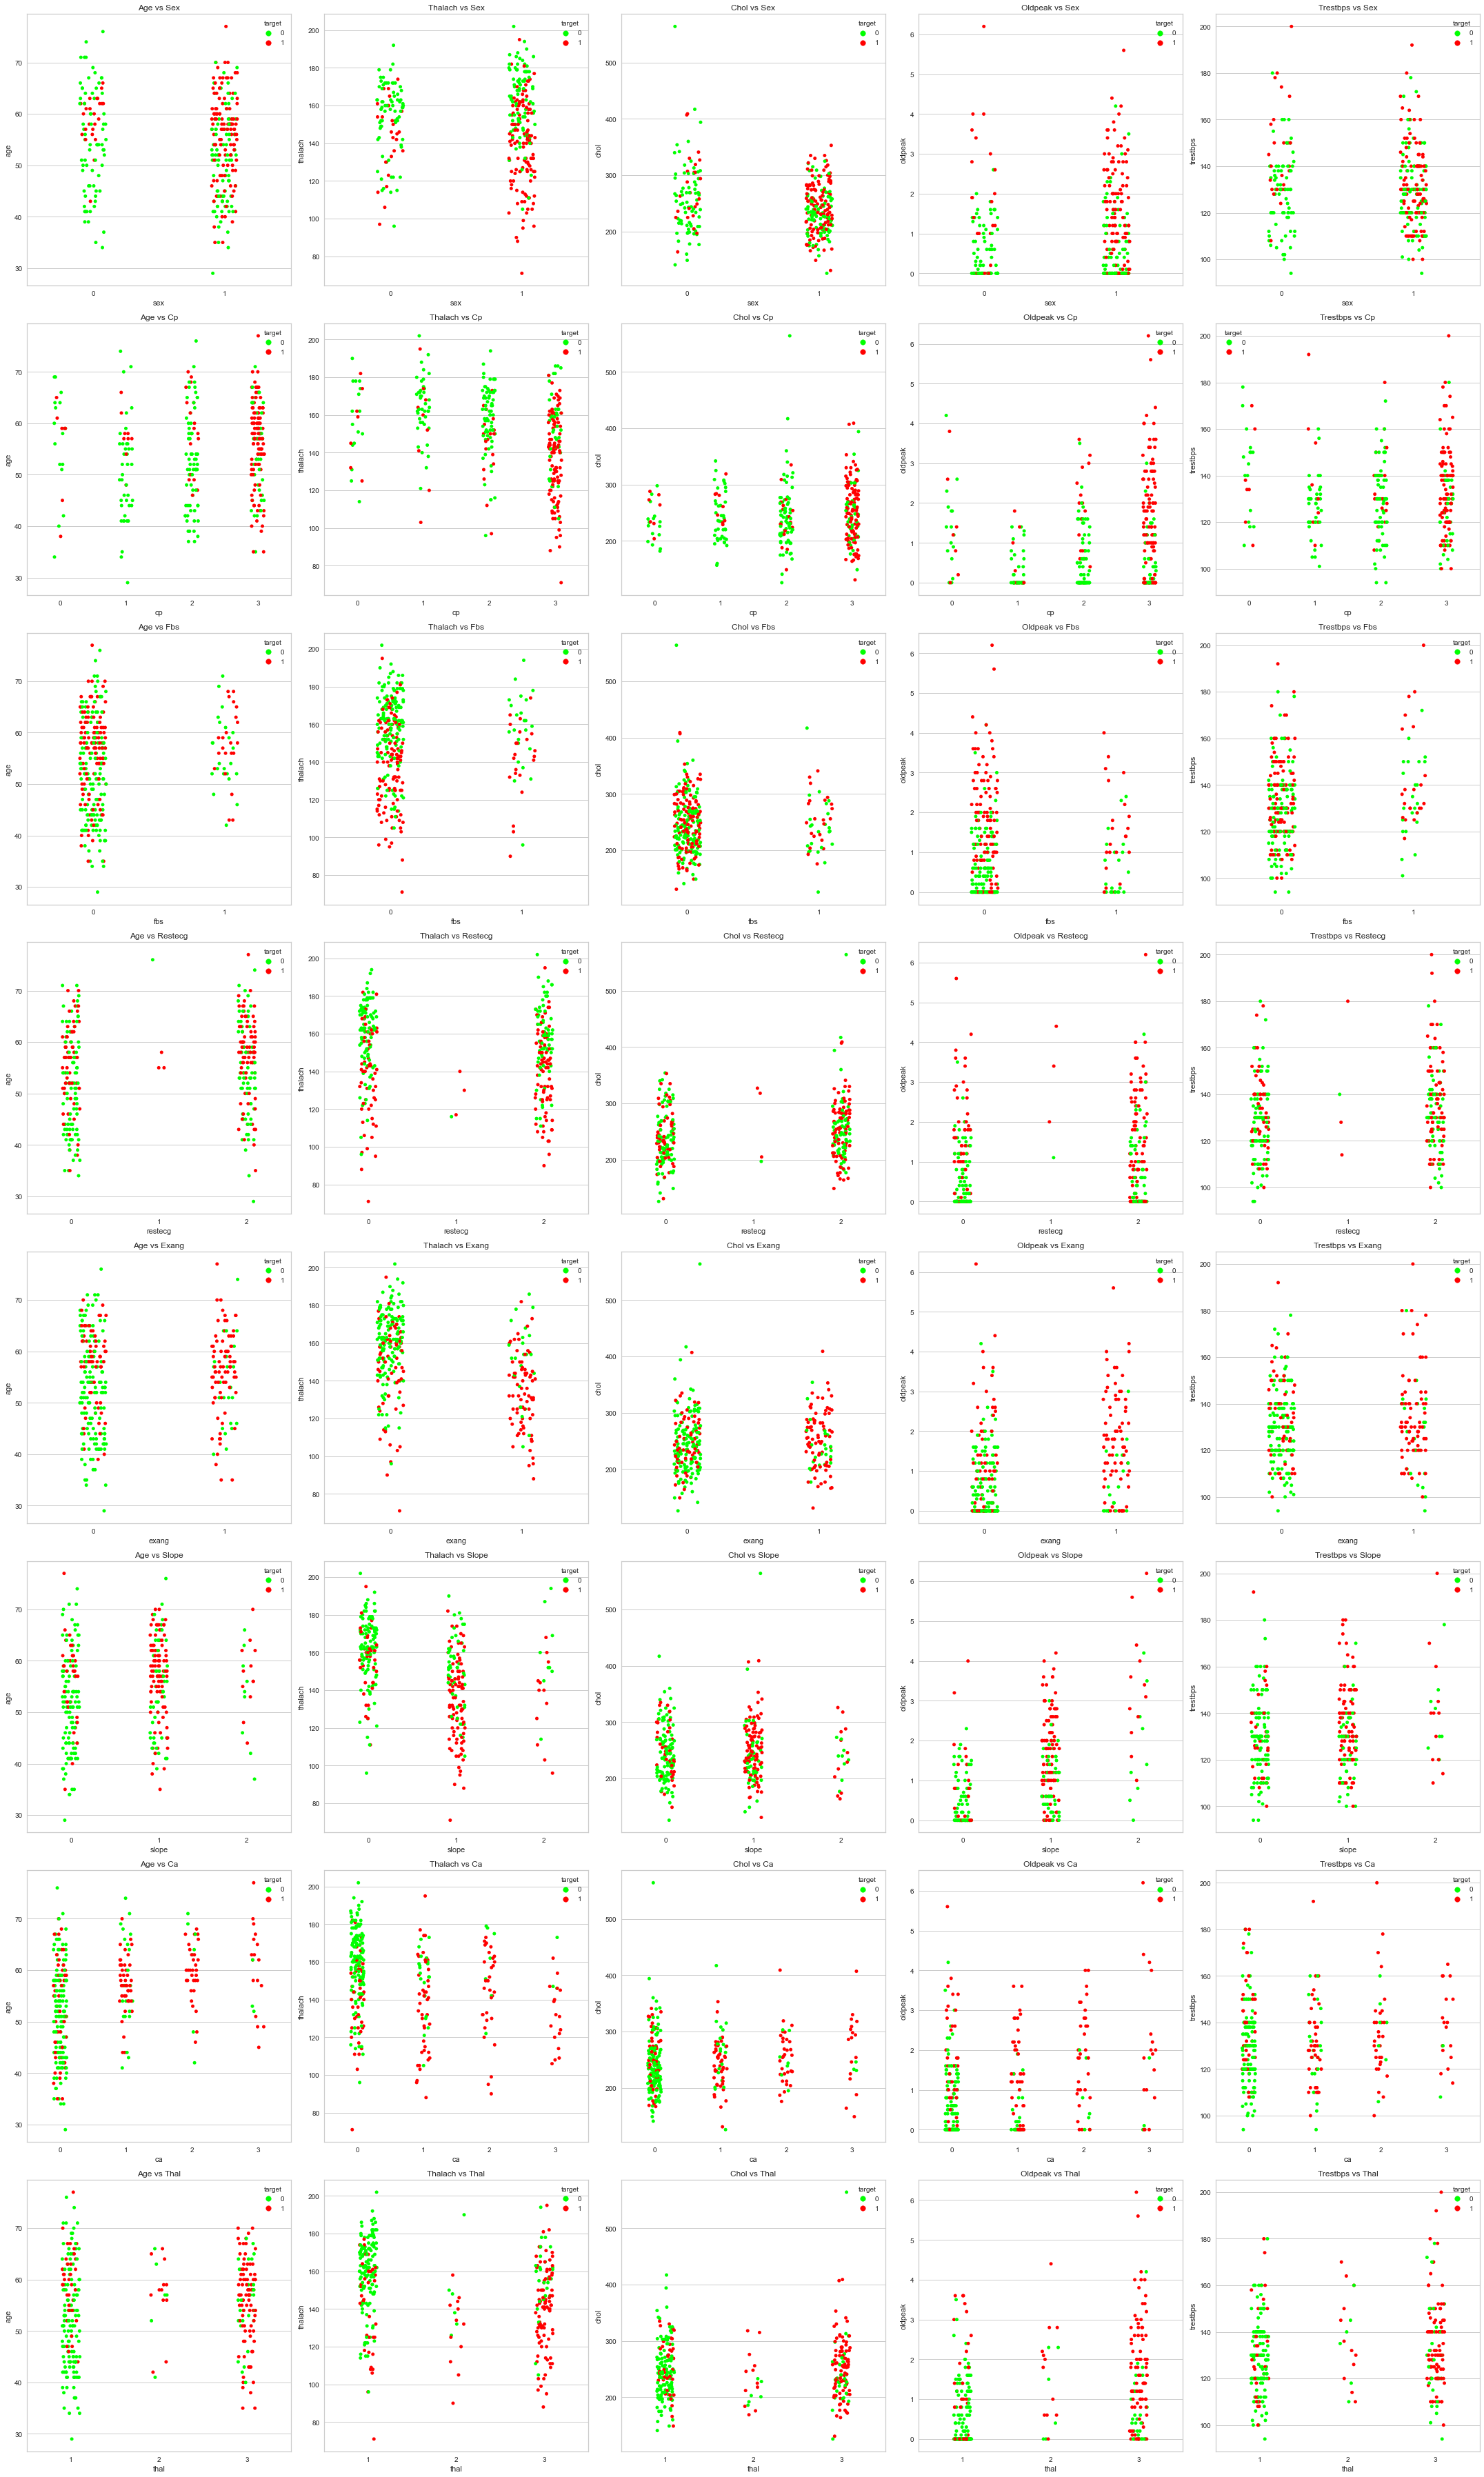

In [36]:
fig, ax = plt.subplots(nrows=len(train_nominal), ncols=len(train_numerical), figsize=(30, 50))
for i, categorical_feature in enumerate(train_nominal):
    for j, numerical_feature in enumerate(train_numerical):
        sns.stripplot(x=categorical_feature, y=numerical_feature, data=train, hue='target', palette=colors, ax=ax[i][j])
        title = numerical_feature.capitalize() + ' vs ' + categorical_feature.capitalize() 
        ax[i][j].set_title(title)
plt.tight_layout()
plt.show()

Insights: Categorical vs Numerical

1. Sex:   
    i. Age: Women tend to develop heart disease later in life than men.  
    ii. Trestbps: Men tend to have higher blood pressure than women.   
    iii. Chol: Men tend to have higher cholesterol levels than women.   
    iv. Thalach: Women tend to have a higher maximum heart rate than men.  
    v. Oldpeak: There may not be a significant difference in exercise-induced ST depression between men and women.   


2. CP (Chest Pain Type):        
    i. Age: Patients with non-anginal chest pain tend to be younger than those with typical angina or atypical angina.   
    ii. Trestbps: Patients with typical angina tend to have higher blood pressure than those with atypical angina or non-anginal chest pain.   
    iii. Chol: There may not be a significant difference in cholesterol levels between patients with different types of chest pain.   
    iv. Thalach: Patients with non-anginal chest pain tend to have a higher maximum heart rate than those with typical or atypical angina.  
    v. Oldpeak: Patients with typical angina tend to have a higher exercise-induced ST depression than those with atypical angina or non-anginal chest pain.  


3. Fbs (Fasting Blood Sugar):    
    i. Age: Patients with high fasting blood sugar tend to be older than those with normal fasting blood sugar.    
    ii. Trestbps: There may not be a significant difference in blood pressure between patients with high and normal fasting blood sugar.   
    iii. Chol: Patients with high fasting blood sugar tend to have higher cholesterol levels than those with normal fasting blood sugar.    
    iv. Thalach: There may not be a significant difference in maximum heart rate between patients with high and normal fasting blood sugar.    
    v. Oldpeak: There may not be a significant difference in exercise-induced ST depression between patients with high and normal fasting blood sugar.   


4. Restecg (Resting Electrocardiographic Results):   
    i. Age: Patients with left ventricular hypertrophy tend to be older than those without.    
    ii. Trestbps: Patients with ST-T wave abnormality tend to have higher blood pressure than those without.    
    iii. Chol: There may not be a significant difference in cholesterol levels between patients with different resting electrocardiographic results. 
    iv. Thalach: Patients with left ventricular hypertrophy tend to have a lower maximum heart rate than those without.   
    v. Oldpeak: Patients with ST-T wave abnormality tend to have a higher exercise-induced ST depression than those without.   


5. Exang (Exercise Induced Angina):    
    i. Age: Patients with exercise-induced angina tend to be younger than those without.   
    i. Trestbps: Patients with exercise-induced angina tend to have higher blood pressure than those without.   
    i. Chol: There may not be a significant difference in cholesterol levels between patients with and without exercise-induced angina.   
    i. Thalach: Patients with exercise-induced angina tend to have a lower maximum heart rate than those without.    
    i. Oldpeak: Patients with exercise-induced angina tend to have a higher exercise-induced ST depression than those without.   


6. Slope (Slope of the Peak Exercise ST Segment):   
    i. Age: There may not be a significant difference in age between patients with different slopes of the peak exercise ST segment.   
    ii. Trestbps: Patients with a flat slope tend to have higher blood pressure than those with an upsloping or downsloping slope.   
    iii. Chol: There may not be a significant difference in cholesterol levels between patients with different slopes of the peak exercise ST segment.   
    iv. Thalach: Patients with an upsloping slope tend to have a higher maximum heart rate than those without.   
    v. Oldpeak: Patients with a flat slope tend to have a higher oldpeak value compared to patients with an upsloping or downsloping slope.
    

7. CA (Number of Major Vessels Colored by Flourosopy):   
    i. Age: Patients with more major vessels colored by flourosopy tend to be older.    
    ii. Trestbps: There may not be a significant difference in blood pressure levels between patients with different number of major vessels colored by flourosopy.   
    iii. Chol: Patients with more major vessels colored by flourosopy tend to have higher cholesterol levels.  
    iv. Thalach: Patients with fewer major vessels colored by flourosopy tend to have a higher maximum heart rate.   
    v. Oldpeak: Patients with more major vessels colored by fluoroscopy tend to have a higher oldpeak value.


8. Thal (Thalassemia):   
    i. Age: There may not be a significant difference in age between patients with different types of thalassemia.    
    ii. Trestbps: Patients with thalassemia type 2 tend to have higher blood pressure levels than those with type 3.    
    iii. Chol: There may not be a significant difference in cholesterol levels between patients with different types of thalassemia.   
    iv. Thalach: Patients with thalassemia type 1 tend to have a lower maximum heart rate than those with type 2 or 3.    
    v. Oldpeak: Patients with a reversible defect (thal=3) tend to have a higher oldpeak value compared to patients with normal blood flow (thal=2) and fixed defect (thal=1).

#### Nominal Features vs Nominal Features

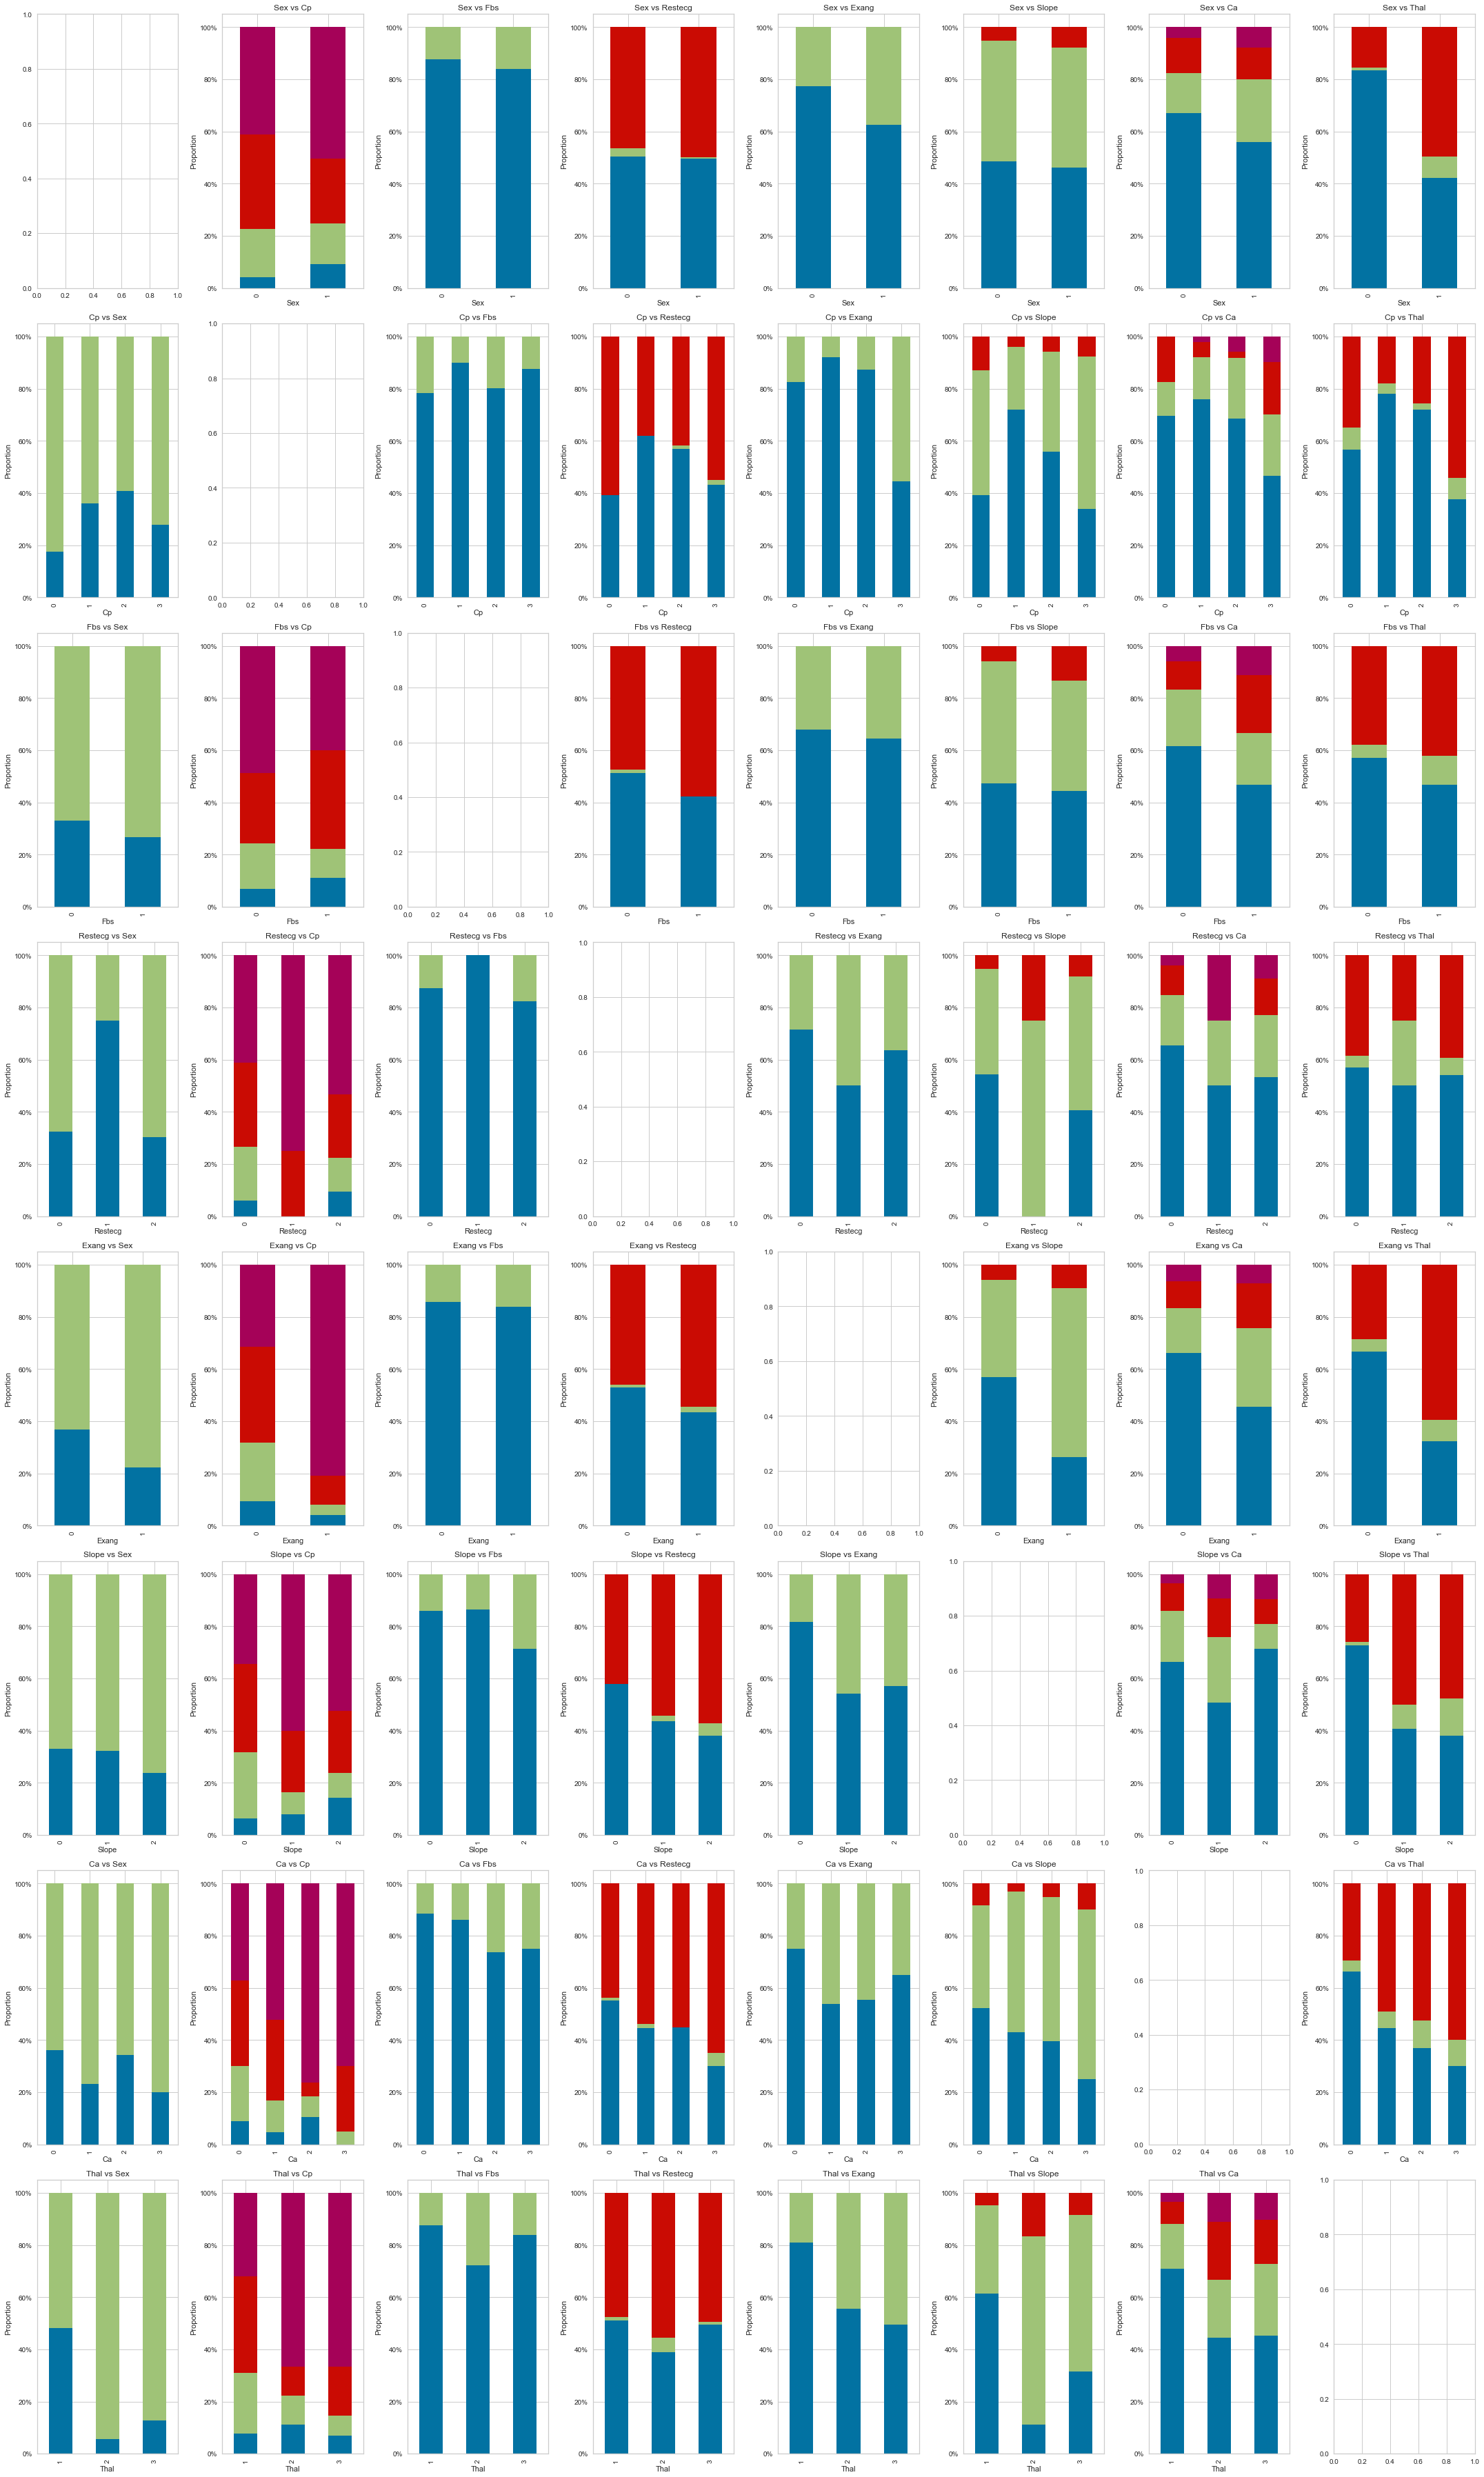

In [37]:
fig, ax = plt.subplots(nrows=len(train_nominal), ncols=len(train_nominal), figsize=(30, 50))
for i, categorical_feature1 in enumerate(train_nominal):
    for j, categorical_feature2 in enumerate(train_nominal):
        if i == j:
            continue
        cross_tab = pd.crosstab(train[categorical_feature1], train[categorical_feature2], normalize='index')
        cross_tab.plot(kind='bar', stacked=True, ax=ax[i][j], legend=None)
        title = categorical_feature1.capitalize() + ' vs ' + categorical_feature2.capitalize()
        ax[i][j].set_title(title)
        ax[i][j].set_xlabel(categorical_feature1.capitalize())
        ax[i][j].set_ylabel('Proportion')
        ax[i][j].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.tight_layout()
plt.show()

Insights: Nominal vs Nominal    
1. Sex    
    i. CP: Men are more likely to have typical angina or atypical angina while women are more likely to have non-anginal pain or asymptomatic chest pain.    
    ii. FBS: There may not be a significant difference in fasting blood sugar levels between men and women.    
    iii. RestECG: Women are more likely to have an abnormal resting electrocardiogram (ST-T wave abnormality) compared to men.     
    iv. Exang: Men are more likely to have exercise-induced angina while women are more likely to experience dyspnea.    
    v. Slope: Women are more likely to have a flat or downsloping slope compared to men.   
    vi. CA: Men are more likely to have more major vessels colored by flourosopy compared to women.
    vii. Thal: There may not be a significant difference in thalassemia types between men and women.
    
    
2. CP (Chest Pain Type)    
    i. CP: Patients with typical angina or atypical angina are more likely to have higher fasting blood sugar levels compared to those with non-anginal pain or asymptomatic chest pain.      
    ii. CP: Patients with typical angina or atypical angina are more likely to have an abnormal resting electrocardiogram (ST-T wave abnormality) compared to those with non-anginal pain or asymptomatic chest pain.     
    iii. CP: Patients with typical angina or atypical angina are more likely to have exercise-induced angina compared to those with non-anginal pain or asymptomatic chest pain.    
    iv. CP: Patients with typical angina or atypical angina are more likely to have an upsloping or horizontal slope compared to those with non-anginal pain or asymptomatic chest pain.      
    v. CP: Patients with typical angina or atypical angina are more likely to have more major vessels colored by flourosopy compared to those with non-anginal pain or asymptomatic chest pain.        
    vi. CP: Patients with typical angina or atypical angina are more likely to have reversible defect thalassemia compared to those with non-anginal pain or asymptomatic chest pain.    
    
    
3. FBS (Fasting Blood Sugar)    
    i. FBS: Patients with higher fasting blood sugar levels are more likely to have an abnormal resting electrocardiogram (ST-T wave abnormality) compared to those with lower fasting blood sugar levels.   
    ii. FBS: There may not be a significant difference in exercise-induced angina between patients with different fasting blood sugar levels.   
    iii. FBS: There may not be a significant difference in the slope of the peak exercise ST segment between patients with different fasting blood sugar levels.    
    iv. FBS: There may not be a significant difference in the number of major vessels colored by flourosopy between patients with different fasting blood sugar levels.    
    v. FBS: Patients with higher fasting blood sugar levels are more likely to have normal thalassemia compared to those with lower fasting blood sugar levels.


4. Restecg (Electrocardiogram Results)      
    i. Sex: There may not be a significant difference in the proportion of males and females with different resting electrocardiographic results.   
    ii. Cp: Patients with non-anginal chest pain may have a higher proportion of normal resting electrocardiographic results compared to those with typical angina, atypical angina, or asymptomatic angina.   
    iii. Fbs: Patients with fasting blood sugar > 120 mg/dL may have a slightly higher proportion of abnormal resting electrocardiographic results compared to those with fasting blood sugar <= 120 mg/dL.   
    iv. Exang: Patients with exercise-induced angina may have a higher proportion of abnormal resting electrocardiographic results compared to those without exercise-induced angina.   
    v. Slope: Patients with a downsloping or flat slope of the peak exercise ST segment may have a higher proportion of abnormal resting electrocardiographic results compared to those with an upsloping slope.   
    vi. Ca: Patients with more major vessels colored by fluoroscopy may have a higher proportion of abnormal resting electrocardiographic results compared to those with fewer major vessels colored.   
    vii. Thal: Patients with a fixed defect or reversable defect on thallium stress test may have a higher proportion of abnormal resting electrocardiographic results compared to those with normal results.


5. Thal (Thalassemia)     
    i. Sex: There may not be a significant difference in the proportion of males and females with different types of thalassemia.   
    ii. Cp: Patients with typical angina or asymptomatic angina may have a higher proportion of normal thalassemia results compared to those with non-anginal chest pain or atypical angina.   
    iii. Fbs: There may not be a significant difference in the proportion of patients with different types of thalassemia based on fasting blood sugar levels.   
    iv. Restecg: Patients with normal resting electrocardiographic results may have a higher proportion of normal thalassemia results compared to those with abnormal resting electrocardiographic results.   
    v. Exang: There may not be a significant difference in the proportion of patients with different types of thalassemia based on the presence or absence of exercise-induced angina.   
    vi. Slope: There may not be a significant difference in the proportion of patients with different types of thalassemia based on the slope of the peak exercise ST segment.   
    vii. Ca: There may not be a significant difference in the proportion of patients with different types of thalassemia based on the number of major vessels colored by fluoroscopy.   


6. Slope   
    i. Cp: There is a significant association between the slope and chest pain type (cp) with higher proportions of patients with type 1 chest pain having a downsloping slope.   
    ii. Exang: Patients with a flat slope tend to have a higher prevalence of having exercise-induced angina (exang).   
    iii. Restecg: There is a higher proportion of patients with normal resting electrocardiographic results (restecg) who have a downsloping slope. 
    iv. fbs, sex, ca and thal: There is no significant association between slope and sex, fasting blood sugar (fbs), number of major vessels colored by fluoroscopy (ca), and thalassemia (thal).  


7. ca   
    i. sex: Females tend to have fewer major vessels colored by fluorocopy compared to males.   
    ii. cp: Patients with typical angina tend to have fewer major vessels colored by fluoroscopy compared to patients with atypical angina or non-anginal pain.   
    iii. restecg: Patients with an abnormal resting electrocardiographic result tend to have more major vessels colored by fluoroscopy compared to patients with a normal resting electrocardiographic result.  
    iv. exang: Patients who experience exercise-induced angina tend to have more major vessels colored by fluoroscopy compared to patients who do not experience exercise-induced angina.   
    v. slope: Patients with a flat slope of the peak exercise ST segment tend to have fewer major vessels colored by fluoroscopy compared to patients with an upsloping or downsloping slope.   
    vi. thal: Patients with a fixed defect thalassemia tend to have more major vessels colored by fluoroscopy compared to patients with a normal or reversible defect thalassemia.   


8. thal (Thalassemia)   
    i. sex: Females tend to have a higher proportion of normal or reversible defect thalassemia compared to males, while males tend to have a higher proportion of fixed defect thalassemia.   
    ii. cp: Patients with non-anginal pain tend to have a higher proportion of normal or reversible defect thalassemia compared to patients with typical or atypical angina.   
    iii. fbs: There may not be a significant difference in thalassemia between patients with different fasting blood sugar levels.   
    iv. restecg: Patients with a normal resting electrocardiographic result tend to have a higher proportion of normal or reversible defect thalassemia compared to patients with an abnormal resting electrocardiographic result.  
    v. exang: Patients who do not experience exercise-induced angina tend to have a higher proportion of normal or reversible defect thalassemia compared to patients who experience exercise-induced angina.   
    vi. slope: Patients with an upsloping slope of the peak exercise ST segment tend to have a higher proportion of normal or reversible defect thalassemia compared to patients with a flat or downsloping slope.   
    vii. ca: Patients with fewer major vessels colored by fluoroscopy tend to have a higher proportion of normal or reversible defect thalassemia compared to patients with more major vessels colored.   

# Statistical Analysis

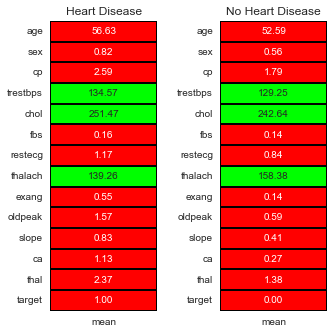

In [38]:
yes = train[train['target'] == 1].describe().T
no = train[train['target'] == 0].describe().T
colors = ['#FF0000','#00FF00']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease')

fig.tight_layout(pad = 2)

Mean values of all the features for cases of heart diseases and non-heart diseases.

## Chi squared test 

Text(0.5, 1.0, 'Selection of Categorical Features')

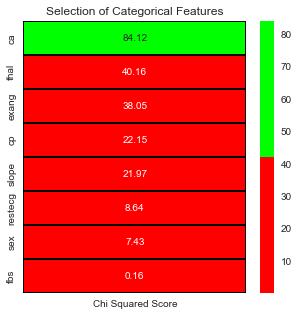

In [39]:
features_nominal = train[train_nominal]
target = train["target"]
best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features_nominal,target)
featureScores = pd.DataFrame(data = fit.scores_,index = list(features_nominal.columns),columns = ['Chi Squared Score']) 
plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features')

Insights:
CA has the highest important features and except FBS all the remaining nominal features are important

## ANOVA test

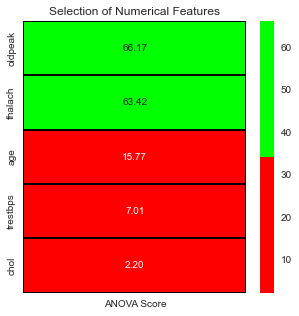

In [40]:
features_numerical = train[train_numerical]
best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features_numerical,target)
featureScores = pd.DataFrame(data = fit.scores_,index = list(features_numerical.columns),columns = ['ANOVA Score']) 
plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Insights:
oldpeak has the highest important features and except chol all the remaining numerical features are preety important

# Data Preprocessing

According to Detailed Analysis I will do Data Preprocessing

## Outlier Treatment

In [41]:
# Treat outliers in Train
for col in train_numerical:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    train[col] = train[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [42]:
outliers_cols = []
def outliers_list_col(data, num_cols, threshold=1.5):
    for col in num_cols:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        iqr = q3 - q1
        lower_threshold = q1 - threshold * iqr
        upper_threshold = q3 + threshold * iqr
        outliers = data[(data[col] < lower_threshold) | (data[col] > upper_threshold)]
        if not outliers.empty:
            outliers_cols.append(col)
    return outliers_cols

outliers_list_col(train,train_numerical)

[]

Outlier treatment done

## Data Normalization

When using a machine learning model, it's important to consider that it doesn't comprehend the units of measurement for the features, treating each input as a simple number. 


This is why data scaling becomes necessary, as it helps the model to understand the true meaning behind each value. There are two main options for data scaling: normalization and standardization. Normalization is typically used for features that don't follow a normal distribution, while standardization is employed for features that are normally distributed but have values that differ significantly from other features. 

For example, to normalize the right-skewed Oldpeak feature, and standardize normally distributed features such as Age, RestingBP, Cholesterol, and MaxHR that have significantly larger or smaller values than other features.

In [43]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,2,0
1,67,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,1,1
2,67,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,3,1
3,37,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,1,0
4,41,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,1,0


In [44]:
mms = MinMaxScaler() 
ss = StandardScaler() 
train['oldpeak'] = mms.fit_transform(train[['oldpeak']])
train['age'] = ss.fit_transform(train[['age']])
train['trestbps'] = ss.fit_transform(train[['trestbps']])
train['chol'] = ss.fit_transform(train[['chol']])
train['thalach'] = ss.fit_transform(train[['thalach']])
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948726,1,0,0.821446,-0.265040,1,2,0.015306,0,0.575,2,0,2,0
1,1.392002,1,3,1.723905,0.851214,0,2,-1.835388,1,0.375,1,3,1,1
2,1.392002,1,3,-0.682652,-0.349285,0,2,-0.910041,1,0.650,1,2,3,1
3,-1.932564,1,2,-0.081013,0.093004,0,0,1.645679,0,0.875,2,0,1,0
4,-1.489288,0,1,-0.081013,-0.875820,0,2,0.984717,0,0.350,0,0,1,0


## Multicolineraity

> Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other. This can lead to unstable and unreliable estimates of the coefficients of the predictor variables, and can make it difficult to interpret the results of the model analysis.

### VIF

In [45]:
# the VIF score for each feature
threshold = 10

X_vif = train.drop('target', axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns

# Sort the features based on their VIF score
vif_sorted = vif.sort_values("VIF Factor", ascending=False)

# Select the features with a VIF score less than the threshold
selected_features = vif_sorted[vif_sorted["VIF Factor"] < threshold]["features"].tolist()
len(selected_features)

13

Insights:

1. There is no Multicolinearity in columns from VIF test

## Feature Separation

In [46]:
X = train.drop("target", axis= 1)
y = train[["target"]]

## Feature Engine

In [47]:
constant = DropConstantFeatures(tol=1)
constant.fit(X)
len(constant.features_to_drop_)
# show the names of the first 2 constant features

constant.features_to_drop_

[]

In [48]:
quasi_constant = DropConstantFeatures(tol=0.998)

quasi_constant.fit(X)

len(constant.features_to_drop_)
quasi_constant.features_to_drop_

[]

In [49]:
duplicates = DropDuplicateFeatures()

duplicates.fit(X)

duplicates.duplicated_feature_sets_

[]

In [50]:
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)

correlated.fit(X)

correlated.correlated_feature_sets_

[]

In [51]:
smart_corr = SmartCorrelatedSelection(
    variables=None, 
    method="pearson",
    threshold=0.7, 
    missing_values="ignore",
    selection_method="model_performance",
    estimator=ExtraTreesClassifier(n_estimators=10, random_state=1))

# find correlated features and select the best from each group

# the method builds a extra trees classifier using each single feature from the correlated feature group
# and retains the feature from the group with the best performance

smart_corr.fit(X, y)

SmartCorrelatedSelection(estimator=ExtraTreesClassifier(n_estimators=10,
                                                        random_state=1),
                         selection_method='model_performance', threshold=0.7)

In [52]:
# the correlated feature groups

smart_corr.correlated_feature_sets_

[]

Insights:

1. This is Feature Engine library used for all feature engineering purposes.

## Lasso Regularization

In [53]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LassoCV object with cross-validation and set the regularization parameter range
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

# Fit the LassoCV model on the training data
lasso_cv.fit(X_train, y_train)

# Get the coefficients of the features selected by LassoCV
coef = pd.Series(lasso_cv.coef_, index=X_train.columns)

# Get the selected features (i.e., features with non-zero coefficients)
selected_features = coef[coef != 0].index.tolist()

# Train a model using only the selected features
model = LogisticRegression()
model.fit(X_train[selected_features], y_train)

# Evaluate the model on the test set
score = model.score(X_test[selected_features], y_test)
print(f"Model accuracy: {score:.3f}")


Model accuracy: 0.902


In [54]:
len(selected_features)

13

>Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization method used in Logistic Regression to prevent overfitting by shrinking the coefficients of the less important features to zero.

> from Lasso no feature come out as not important

## Feature Importance

Feature importance by Emsemble Tree Methods

### Extra Tree Classifier

In [55]:
# Feature Importance using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_})
importances_df = importances_df.sort_values('Importance', ascending=False)
importances_df

,Feature,Importance
12,thal,0.150715
11,ca,0.130397
2,cp,0.108465
8,exang,0.092926
7,thalach,0.083688
9,oldpeak,0.081051
0,age,0.068183
4,chol,0.063805
10,slope,0.061486
3,trestbps,0.057835


### Random Forest Classifier

In [56]:
# Ensemble Techniques
model = RandomForestClassifier()
model.fit(X, y)
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_})
importances_df = importances_df.sort_values('Importance', ascending=False)
importances_df

,Feature,Importance
2,cp,0.135336
12,thal,0.120155
9,oldpeak,0.115569
7,thalach,0.111900
11,ca,0.107510
0,age,0.088447
4,chol,0.086435
3,trestbps,0.072399
10,slope,0.051923
8,exang,0.046272


Insights:

1. I didn't select features based on Ensemble tree methods because it will create the problem of overfitting

## Train- test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242, 1), (61, 13), (61, 1))

# Auto ML

I used this Auto ML to find the best 10 models that work perfect here and will do mannual ML also

In [59]:
df_temp = pd.concat([X_train,y_train],axis = 1)

In [60]:
setup(data = df_temp, target="target", session_id=42)
setup_df = pull()

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(242, 14)"
4,Transformed data shape,"(242, 14)"
5,Transformed train set shape,"(169, 14)"
6,Transformed test set shape,"(73, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [61]:
best_models = compare_models()
best_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8581,0.9115,0.8161,0.8702,0.8384,0.7127,0.7186,0.4360
lightgbm,Light Gradient Boosting Machine,0.8581,0.9191,0.7893,0.8893,0.8305,0.7096,0.7193,0.5410
et,Extra Trees Classifier,0.8162,0.9034,0.7339,0.8550,0.7812,0.6252,0.6392,0.3930
nb,Naive Bayes,0.8103,0.8819,0.7732,0.8163,0.7847,0.6170,0.6273,0.3370
rf,Random Forest Classifier,0.8103,0.8879,0.7089,0.8550,0.7625,0.6094,0.6268,0.3890
gbc,Gradient Boosting Classifier,0.8044,0.8767,0.7768,0.8002,0.7813,0.6057,0.6138,0.5690
knn,K Neighbors Classifier,0.7930,0.8665,0.7250,0.8140,0.7558,0.5785,0.5925,0.4080
lr,Logistic Regression,0.7926,0.8914,0.7214,0.8213,0.7546,0.5777,0.5940,0.8900
ridge,Ridge Classifier,0.7926,0.0000,0.7214,0.8213,0.7546,0.5777,0.5940,0.4450
ada,Ada Boost Classifier,0.7926,0.8682,0.7357,0.8077,0.7567,0.5783,0.5940,0.3960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

Insights:


Top 5 Models


1. Extreme Gradient Boosting
2. Logistic Regression
3. Naive Bayes
4. Random Forest Classifier	
5. K Neighbors Classifier

# Mannual Modelling

## Models

In [62]:
kf = KFold(n_splits=5)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(RandomForestClassifier(random_state=42))
classifiers.append(LogisticRegression(random_state=42))
classifiers.append(XGBClassifier(random_state=42))
classifiers.append(GaussianNB())
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kf, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValerrors": cv_std,
    "Algorithm":["KNeighbors","RandomForest","LogisticRegression","XGBoost","Naive Bayes"]})
cv_res.sort_values(by = 'CrossValMeans', ascending = False, inplace=True)

In [63]:
print(cv_res)

   CrossValMeans  CrossValerrors           Algorithm
4       0.830527        0.033440         Naive Bayes
2       0.818112        0.040464  LogisticRegression
0       0.793452        0.050278          KNeighbors
1       0.785034        0.043197        RandomForest
3       0.776701        0.054494             XGBoost


## Hyperparameter Tunning of Models

In [64]:
param_grid_xgb = {'n_estimators': [50, 100, 200],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.01, 0.1, 1.0],
                  'subsample': [0.5, 0.8, 1.0],
                  'colsample_bytree': [0.5, 0.8, 1.0]}

param_grid_lr = {'C': [0.1, 1, 10],
                 'penalty': ['l1', 'l2'],
                 'solver': ['liblinear']}

param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [3, 5, 7],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

param_grid_knn = {'n_neighbors': [3, 5, 7, 9,11],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

xgb = XGBClassifier()
lr = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5)
lr_grid = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5)
nb_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

xgb_grid.fit(X_train, y_train)
lr_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

xgb_model = xgb_grid.best_estimator_
lr_model = lr_grid.best_estimator_
nb_model = nb_grid.best_estimator_
rf_model = rf_grid.best_estimator_
knn_model = knn_grid.best_estimator_

xgb_preds = xgb_grid.predict(X_test)
lr_preds = lr_grid.predict(X_test)
nb_preds = nb_grid.predict(X_test)
rf_preds = rf_grid.predict(X_test)
knn_preds = knn_grid.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_preds)
lr_acc = accuracy_score(y_test, lr_preds)
nb_acc = accuracy_score(y_test, nb_preds)
rf_acc = accuracy_score(y_test, rf_preds)
knn_acc = accuracy_score(y_test, knn_preds)

results = pd.DataFrame({'Classifier': ['XGBoost', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'K-Nearest Neighbors'],
                        'Accuracy': [xgb_acc, lr_acc, nb_acc, rf_acc,knn_acc]})
results

,Classifier,Accuracy
0,XGBoost,0.901639
1,Logistic Regression,0.901639
2,Naive Bayes,0.836066
3,Random Forest,0.918033
4,K-Nearest Neighbors,0.885246


## Classification Report

In [65]:
xgb_report = classification_report(y_test, xgb_preds)
lr_report = classification_report(y_test, lr_preds)
nb_report = classification_report(y_test, nb_preds)
rf_report = classification_report(y_test, rf_preds)
knn_report = classification_report(y_test, knn_preds)

print("XGBoost Classification Report:\n", xgb_report)
print("Logistic Regression Classification Report:\n", lr_report)
print("Naive Bayes Classification Report:\n", nb_report)
print("Random Forest Classification Report:\n", rf_report)
print("K-Nearest Neighbors Classification Report:\n", knn_report)

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg    

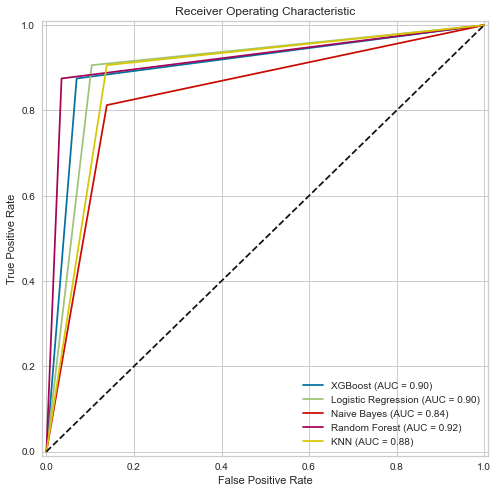

In [66]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_preds)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_preds)
roc_auc_lr = auc(fpr_lr, tpr_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_preds)
roc_auc_nb = auc(fpr_nb, tpr_nb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_preds)
roc_auc_rf = auc(fpr_rf, tpr_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_preds)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8,8))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_knn)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'KNN')

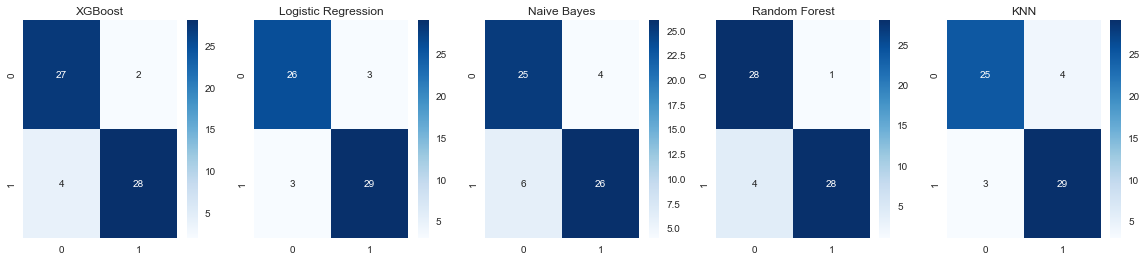

In [67]:
cm_xgb = confusion_matrix(y_test, xgb_preds)
cm_lr = confusion_matrix(y_test, lr_preds)
cm_nb = confusion_matrix(y_test, nb_preds)
cm_rf = confusion_matrix(y_test, rf_preds)
cm_knn = confusion_matrix(y_test, knn_preds)

fig, axs = plt.subplots(ncols=5, figsize=(20,4))

sns.heatmap(cm_xgb, cmap='Blues', annot=True, fmt='d', ax=axs[0]).set_title('XGBoost')
sns.heatmap(cm_lr, cmap='Blues', annot=True, fmt='d', ax=axs[1]).set_title('Logistic Regression')
sns.heatmap(cm_nb, cmap='Blues', annot=True, fmt='d', ax=axs[2]).set_title('Naive Bayes')
sns.heatmap(cm_rf, cmap='Blues', annot=True, fmt='d', ax=axs[3]).set_title('Random Forest')
sns.heatmap(cm_knn, cmap='Blues', annot=True, fmt='d', ax=axs[4]).set_title('KNN')

# Interpretation of Models

## Best Model - XGB

In [120]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

**The Best Model came out is XGB which is not Overfit and Underfit**

# Model Interpretation

SHAP (SHapley Additive exPlanations) is a method for interpreting the predictions of machine learning models. It provides a way to understand how different features contribute to the output of the model for a particular instance.

## SHAP

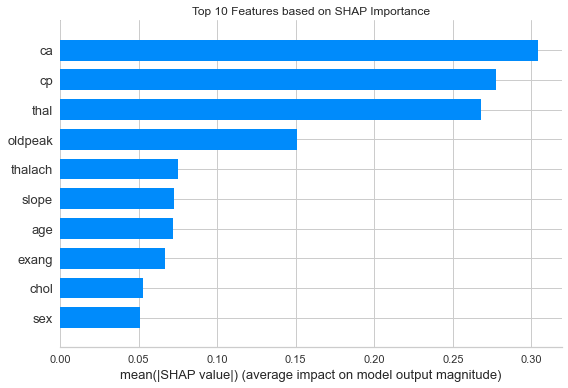

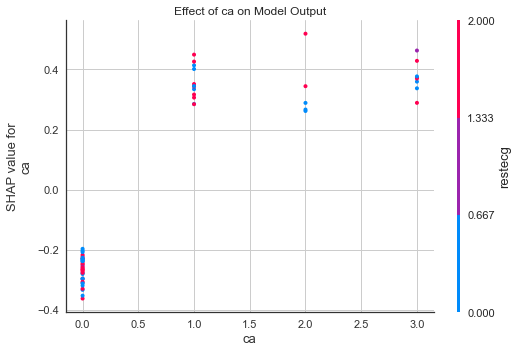

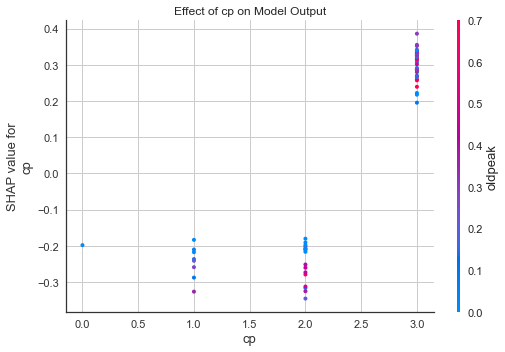

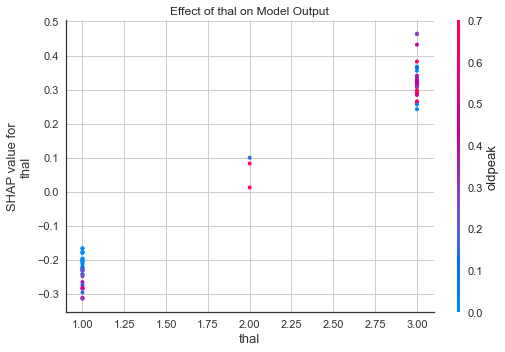

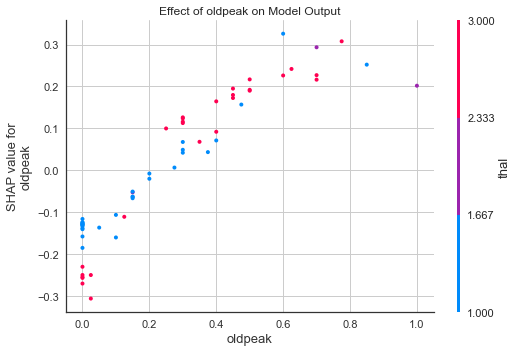

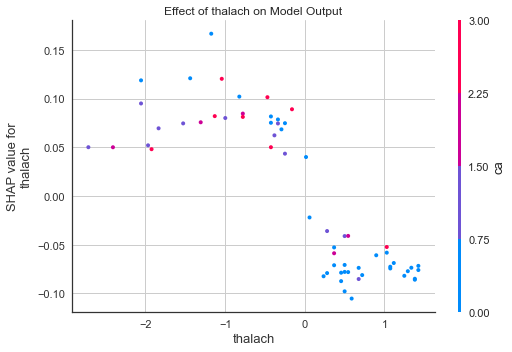

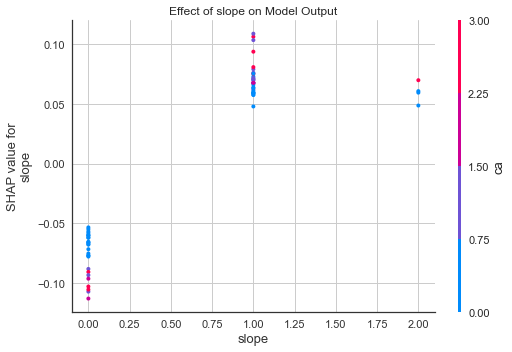

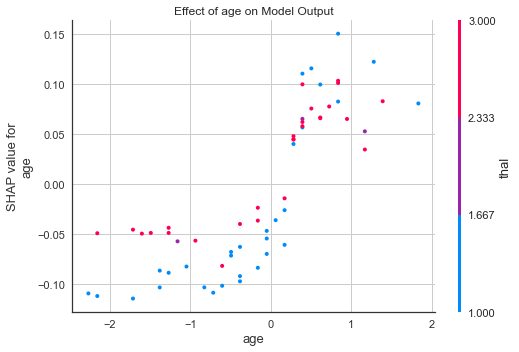

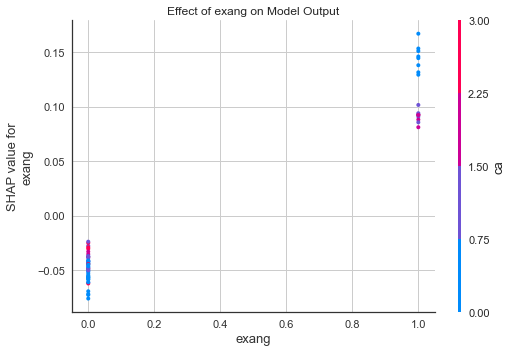

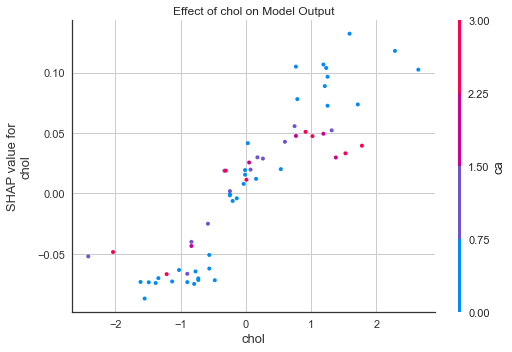

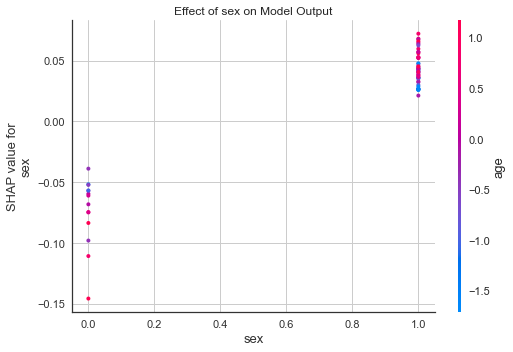

In [107]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_test)
top10_idx = (-np.abs(shap_values).mean(0)).argsort()[:10]
top10_features = X_train.columns[top10_idx]
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X_test.columns, max_display=len(top10_features), show=False)
plt.title("Top 10 Features based on SHAP Importance")
plt.tight_layout()
plt.show()
for feature in top10_features:
    shap.dependence_plot(feature, shap_values, X_test, show=False)
    plt.title(f"Effect of {feature} on Model Output")
    plt.tight_layout()
    plt.show()

Insights:

> First Plot is Best features plot - Top 10 features that explains maximum variation in Target Variable are:

        1. CA
        2. CP
        3. Thal
        4. oldpeak
        5. thalach
        6. slope
        7. age
        8. exang
        9. chol
        10. sex
        
        
> Second plot is SHAP Dependency Plot of top 10 features.
> SHAP dependency plot is very useful plot in understanding the effect of single feature accross entire dataset. In addition to that, it will also help in finding out any interaction effect present in the features. It shows the negative and Positive Impact.

# Pipeline

In [108]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [109]:
import pickle

In [156]:
clf = lr_model

In [157]:
file_name = 'model.pkl'

In [158]:
with open(file_name, 'wb') as file:
    pickle.dump(clf, file)

In [159]:
file.close()

In [160]:
def nb_pipeline(data):
    for col in ['thalach', 'chol', 'trestbps', 'oldpeak']:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    mms = MinMaxScaler() 
    ss = StandardScaler() 
    data['oldpeak'] = mms.fit_transform(data[['oldpeak']])
    data['age'] = ss.fit_transform(data[['age']])
    data['trestbps'] = ss.fit_transform(data[['trestbps']])
    data['chol'] = ss.fit_transform(data[['chol']])
    data['thalach'] = ss.fit_transform(data[['thalach']])
    
    loaded_model = pickle.load(open("model.pkl", 'rb'))
    nb_preds = loaded_model.predict(data)
    print("Prediction is : ", nb_preds[0])

In [161]:
df = pd.read_csv("Dataset.csv")

In [162]:
df_sample_temp = df.sample(1)
df_sample_temp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
228,54,1,3,110,206,0,2,108,1,0.0,1,1,1,1


In [163]:
df_sample_temp.drop("target", axis = 1, inplace = True)

In [164]:
df_sample_temp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
228,54,1,3,110,206,0,2,108,1,0.0,1,1,1


In [165]:
nb_pipeline(df_sample_temp)

Prediction is :  1


# Deployment

https://vaibhavarora13-int-heart-disease-20xt4b.streamlit.app/ 

<center> <h1> THANK YOU